In [2]:
import os
os.chdir("/workspaces/BAIT")

from figures.fig_utils import *

# Chapter 3: Method

## Hypothesis

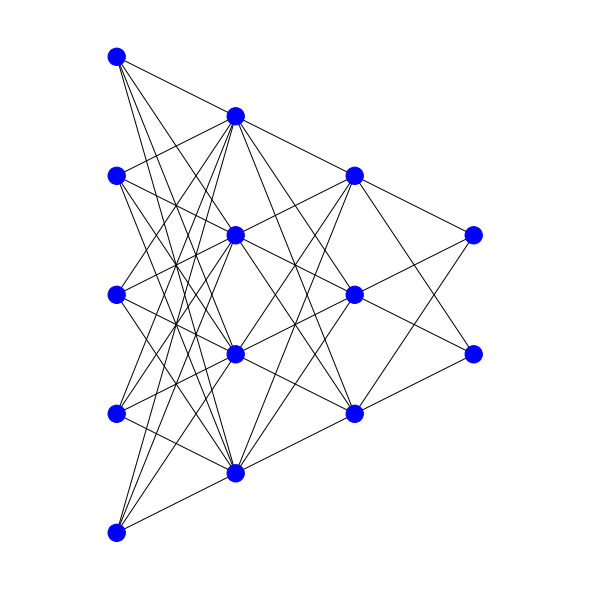

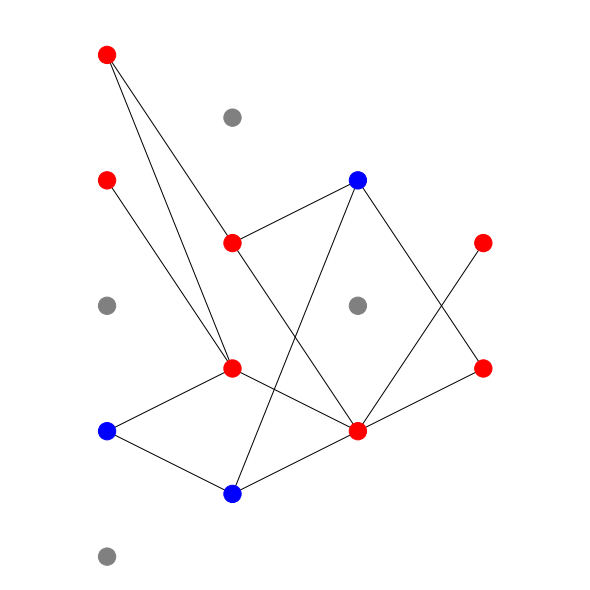

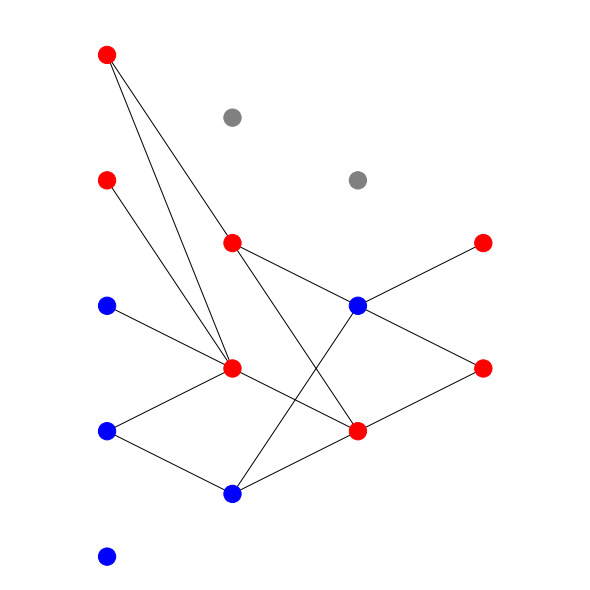

In [6]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import random

subset_sizes = [5, 4,3, 2]
def plot_graph(edges, colors):
    def multilayered_graph(*subset_sizes):
        extents = nx.utils.pairwise(itertools.accumulate((0,) + subset_sizes))
        layers = [range(start, end) for start, end in extents]
        G = nx.Graph()
        for (i, layer) in enumerate(layers):
            G.add_nodes_from(layer, layer=i)

        if edges == "all":
            for layer1, layer2 in nx.utils.pairwise(layers):
                G.add_edges_from(itertools.product(layer1, layer2))
        else:
            G.add_edges_from(edges)
        return G

    G = multilayered_graph(*subset_sizes)
    


    pos = nx.multipartite_layout(G, subset_key="layer")
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, node_color=colors, with_labels=False)
    plt.axis("equal")
    return plt




color = ["blue"] * sum(subset_sizes)

plot_graph("all", color).savefig('figures/4_fully_connected')
edges =[
    (0,7),
    (0,6),
    (1,7),
    (3,8),
    (3,7),
    (6,9),
    (6,11),
    (7,11),
    (8,9),
    (8,11),
    (11,12),
    (11,13),
    (9,13),
]
color = [
    'red',
    'red',
    'grey',
    'blue',
    'grey',
    'grey',
    'red',
    'red',
    'blue',
    'blue',
    'grey',
    'red',
    'red',
    'red'
 ]
plot_graph(edges, color).savefig('figures/4_subnet_a')


edges =[
    (0,7),
    (0,6),
    (1,7),
    (2,7),
    (3,8),
    (3,7),
    (6,10),
    (6,11),
    (7,11),
    (8,11),
    (8,10),
    (10,12),
    (11,13),
    (10,13),
]
color = [
    'red',
    'red',
    'blue',
    'blue',
    'blue',
    'grey',
    'red',
    'red',
    'blue',
    'grey',
    'blue',
    'red',
    'red',
    'red'
 ]
plot_graph(edges, color).savefig('figures/4_subnet_b')


# Meta Learn

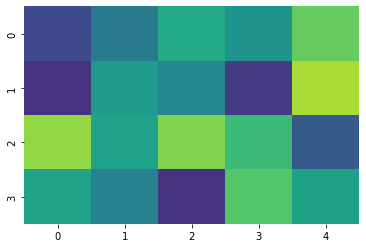

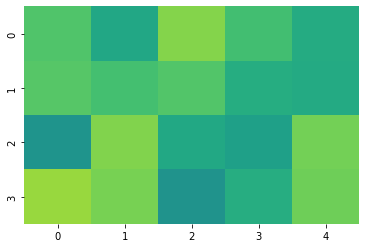

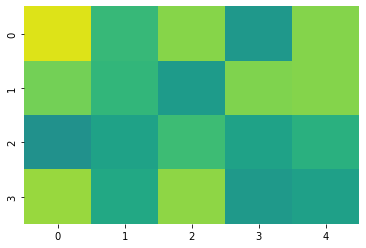

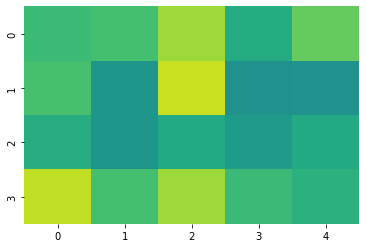

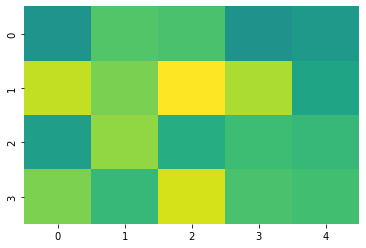

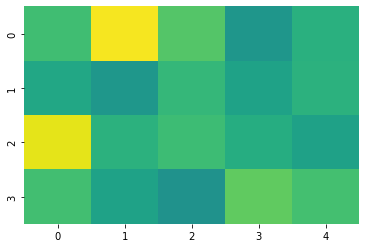

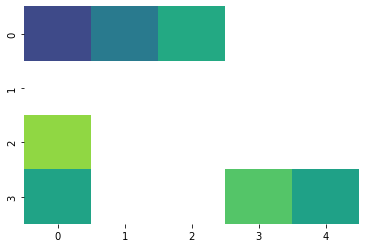

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def get_heatmap(t, m):
    plt.figure()
    g = sns.heatmap(data=t, mask=m, cbar=False,cmap=sns.color_palette("viridis", as_cmap=True),  vmin=-0.2, vmax=0.2) 
    return g


t_init = np.random.normal(0, 0.1, size=(4,5))

g = get_heatmap(t_init, t_init == 0, )
savefig(g, "3_metalearn_initial_weights")

for i in range(4):
    t = np.random.normal(0, 0.1, size=(4,5))
    g = get_heatmap(np.abs(t), t == 0)
    savefig(g, f"3_metalearn_score_{i}")

t = np.random.normal(0, 0.1, size=(4,5))
g = get_heatmap(np.abs(t), t == 0)
savefig(g, f"3_metalearn_score_final")

k = 7
g =get_heatmap(t_init, np.where(np.abs(t) < np.sort(np.abs(t).ravel())[-k], 1, 0))
savefig(g, "3_metalearn_score_masked")

## Score Stacking

NameError: name 'savefig' is not defined

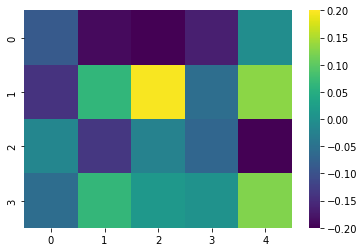

In [1]:
import numpy as np
import seaborn as sns

def get_heatmap(t, m, name, **kwargs):
    g = sns.heatmap(data=t, mask=m, cmap=sns.color_palette("viridis", as_cmap=True),  vmin=-0.2, vmax=0.2, **kwargs) 
    savefig(g, name)

t = np.random.normal(0, 0.1, size=(4,5))

get_heatmap(t, t == 0, "4_default_concept_initial_weights")



Top-k masked

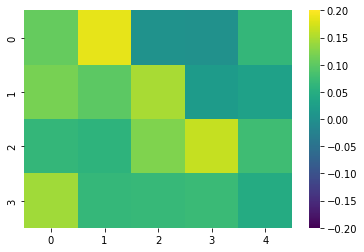

In [ ]:
k = 7
get_heatmap(np.abs(t), t == 0, "4_default_concept_scores")

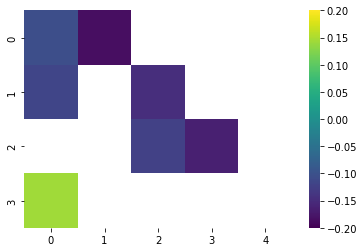

In [ ]:
k = 7
get_heatmap(t, np.where(np.abs(t) < np.sort(np.abs(t).ravel())[-k], 1, 0), "4_default_concept_topk_weights")

## Overview on different pruning schemes

In [ ]:
import pandas as pd

print(pd.DataFrame({
       "Description": ["Scoring Criterion", "Scoring scheme", "Pruning scheme"],
       "LTH": ["magnitude", "single-shot", "iterative"],
       "GraSP": ["magnitude", "single-shot", "iterative"],
       "SNIP": ["magnitude", "single-shot", "iterative"],
       "Synflow": ["magnitude", "single-shot", "iterative"],
    }).set_index("Description").to_latex())

\begin{tabular}{lllll}
\toprule
{} &          LTH &        GraSP &         SNIP &      Synflow \\
Description       &              &              &              &              \\
\midrule
Scoring Criterion &    magnitude &    magnitude &    magnitude &    magnitude \\
Scoring scheme    &  single-shot &  single-shot &  single-shot &  single-shot \\
Pruning scheme    &    iterative &    iterative &    iterative &    iterative \\
\bottomrule
\end{tabular}



/tmp/ipykernel_67308/1033731594.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame({


# Chapter 5: Experiments

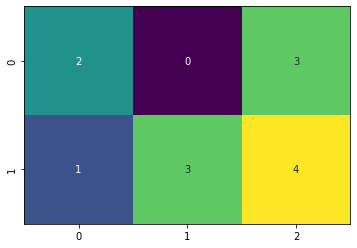

In [ ]:
import torch
import seaborn as sns
import numpy as np

a = torch.tensor([0,1,2,3,3,4]).reshape((2,3))
np.random.shuffle(a.flatten().numpy())

g = sns.heatmap(a, cbar=False, annot=True, square=True, cmap=sns.color_palette("viridis", as_cmap=True), vmin=0, vmax=4)

for _, spine in g.spines.items():
    spine.set_visible(True)
savefig(g, "5_selection_scores")

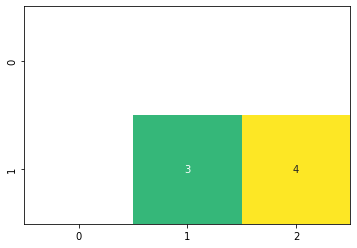

In [ ]:
topk, indices = a.flatten().topk(2)

mask = torch.ones_like(a.flatten()).index_fill(-1, indices, 0.).reshape(a.size())
g = sns.heatmap(
    a, 
    mask=mask.numpy(), 
    cbar=False, annot=True, square=True, cmap=sns.color_palette("viridis", as_cmap=True)
    , vmin=1, vmax=4
    )

for _, spine in g.spines.items():
    spine.set_visible(True)
savefig(g, "5_selection_topk")

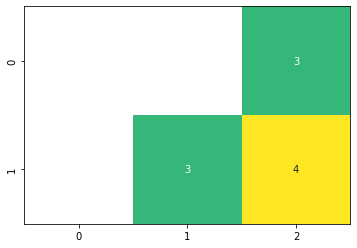

In [ ]:

threshold, _ = torch.kthvalue(a.flatten(), a.numel() - 2 )

g = sns.heatmap(
    a, 
    mask=(a<threshold.item()).numpy(), 
    cbar=False, annot=True, square=True, cmap=sns.color_palette("viridis", as_cmap=True)
    , vmin=1, vmax=4
    )
for _, spine in g.spines.items():
    spine.set_visible(True)
savefig(g, "5_selection_threshold")

In [ ]:
threshold

tensor(3)

# Chapter 6: Results

In [ ]:
indices

tensor([5, 4])

In [ ]:
sdafasdfasdf

## Init Strategies

In [ ]:
# def filter_baselines(row):
def baseline_query():
    mapping = {
        "rand": "o1",
        "mag": "i1",
        "snip": "o1",
        "grasp": "o1",
        "synflow": "o10",
    }
    return " or ".join([f'phase_0_strategy == "{algo}" and type_short == "{type}"' for algo, type in mapping.items()])

# df_bl = df.query(baseline_query())
df_bl = df

import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'figure.figsize':(6,4)}
sns.set_theme(style="ticks", rc=custom_params)


g = sns.relplot(data=df_bl, x="final_sparsity", y="accuracy", palette="tab10", kind="scatter", row=df_bl["phase_0_strategy"], hue="init_strategy")
g.set(
    xlim=(0.5, 0.004),
    ylim=(0, 100),
    xscale="log",
    )
savefig(g, "init_strategies")

NameError: name 'df' is not defined

## Example pruned layers SNIP

In [ ]:
from analysis.results_utils import get_tensors, print_histograms


# for layer in ["fc_layers.0.weight", "fc_layers.1.weight", "fc.weight"]:
experiment = {
    "init_id": "5f35eb1e-dac5-11ec-aad5-0242ac120003",
    "sparsity": 0.005,
    "experiment_type": "i10",
    "algo": "snip",
    "layer_name": "fc_layers.0.weight",
    "init_strategy": "standard"
}

t = get_tensor(**experiment, kind="initial_weight")
import seaborn as sns
sns.set(rc={'figure.figsize':(30, 78.4)})
mask = get_tensor(**experiment, kind="mask")
g = sns.heatmap(torch.abs(t).cpu().detach().numpy(),mask = ~mask.cpu().detach().numpy(), cmap="flare", cbar=False)
savefig(g, f'heatmap_snip_fc_layers0weight' )

In [ ]:
t.size()[1]/100, t.size()[0]/100

In [ ]:
experiment = {
    "init_id": "5f35eb1e-dac5-11ec-aad5-0242ac120003",
    "sparsity": 0.005,
    "experiment_type": "i10",
    "algo": "snip",
    "layer_name": "fc.weight",
    "init_strategy": "standard"
}

t = get_tensor(**experiment, kind="initial_weight")
mask = get_tensor(**experiment, kind="mask")
sns.heatmap(torch.abs(t).cpu().detach().numpy(),mask = ~mask.cpu().detach().numpy(), cmap="flare")

---
old

In [ ]:
overview = df.groupby(["final_sparsity", "phase_0_strategy", "init_strategy", "type_short"]).mean().sort_values(by="accuracy", ascending=False).reset_index()
overview = overview[["final_sparsity", "phase_0_strategy", "init_strategy", "type_short", "accuracy", "total_iterations"]]

how much can be improved by the inits?

In [ ]:
df_p = overview[["final_sparsity", "phase_0_strategy", "init_strategy", "type_short", "accuracy"]]
df_p = df_p[df_p["type_short"].isin(["o1","o10"])]
df_p = df_p[df_p["final_sparsity"] == "0.010"]
df_p = df_p.pivot(index=["phase_0_strategy", "type_short"], columns="init_strategy", values="accuracy") #.reset_index()

# value_to_int = {j:i for i,j in enumerate(pd.unique(df_p.values.ravel()))} # like you did
# n = len(value_to_int)     
# # discrete colormap (n samples from a given cmap)
# cmap = sns.color_palette("Pastel2", n) 
# ax = sns.heatmap(df_p.replace(value_to_int), cmap=cmap) 
# # modify colorbar:
# colorbar = ax.collections[0].colorbar 
# r = colorbar.vmax - colorbar.vmin 
# colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
# colorbar.set_ticklabels(list(value_to_int.keys()))
def calc_diff(row):
    for col in row.keys():
        if not col == "standard":
            row[col] = row[col] - row["standard"]

    row["standard"] = 0
    return row
df_p = df_p.apply(lambda row: calc_diff(row), axis = 1)
cmap = sns.diverging_palette(10,100, sep=2, as_cmap=True)
# from matplotlib.colors import DivergingNorm
# div_norm = DivergingNorm(vmin=df.min(), vcenter=0, vmax=df.max())

sns.heatmap(data=df_p, cmap=cmap,center=0.00)

In [ ]:
p = overview[["accuracy", "final_sparsity", "init_strategy", "type_short", "phase_0_strategy"]]
value_to_int = {j:i for i,j in enumerate(pd.unique(overview.values.ravel()))} # like you did
n = len(value_to_int)     
# discrete colormap (n samples from a given cmap)
cmap = sns.color_palette("Pastel2", n) 
ax = sns.heatmap(overview[[
    "init_strategy", "phase_0_strategy"]].replace(value_to_int), cmap=cmap) 
# modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))    
# sns.heatmap(data=overview, x="init_strategy", y="phase_0_strategy", hue="accuracy")

we can outperform the original lotteryticket hypothesis at low sparsities using dirffernt inits

In [ ]:
p = overview[overview[""]]

In [ ]:
df_p = df[df["type_short"].isin(["o1", "o10"])]
g = sns.catplot(data=df_p, x="final_sparsity", y="accuracy", hue="phase_0_strategy", row="init_strategy")
g.set(ylim=(85,95))

In [ ]:
# df_p = df[df["type_short"].isin(["o1", "o10"]) &(df["final_sparsity"] == "0.005")]
df_p = df[df["type_short"].isin(["o1"]) &(df["final_sparsity"] == "0.005")].sort_values(by="init_strategy")
sns.barplot(data=df_p, x="phase_0_strategy", y="accuracy", hue="init_strategy")

takeaway: in a strict one-shot way, grasp & bimodal inits are the best

In [ ]:
df_p = df[df["type_short"].isin(["o10"]) &(df["final_sparsity"] == "0.005")].sort_values(by="init_strategy")
sns.barplot(data=df_p, x="phase_0_strategy", y="accuracy", hue="init_strategy")

In [ ]:
# df_p = df[["final_sparsity", "accuracy", "type_short", "init_strategy", "phase_0_strategy"]]
df_p = df
sns.stripplot(data=df_p, x="final_sparsity", y = "accuracy", hue="phase_0_strategy")

In [ ]:
df_p = df[(df["type_short"] == "o10") & (df["final_sparsity"] == "0.010")]
sns.pairplot(data=df_p[["final_sparsity", "accuracy", "total_epochs", "init_strategy"]], hue="init_strategy")

In [ ]:
overview = df.groupby(["final_sparsity", "phase_0_strategy", "init_strategy", "type_short"]).mean().sort_values(by="accuracy", ascending=False).reset_index()
overview